# ML Marathon
We will be utilising the dataset to predict which clients are most likely to subscribe to the product, Bank Term Deposit in the near future using the features given.

#### Attribute Information (Input Features)
age
job
marital	
education	
default
balance
housing
loan
contact
day
month
duration
campaign
pdays
previous
poutcome
Target :
deposit : Displays whether the client has subscribed to the product or not : 1 = yes 0 = no

# Importing Libraries

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Reading Data

In [62]:
data=pd.read_csv("/content/data.csv") 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


## Identifying Data

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


## Shape of Data 
#### (This means dataset has 8371 records and 17 columns)

In [48]:
data.shape

(8371, 17)

## Finding out columns with missing entries

In [49]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Finding out count of data

In [55]:
count=data.count() #Display the Count for each column
count

age          8371
job          8371
marital      8371
education    8371
default      8371
balance      8371
housing      8371
loan         8371
contact      8371
day          8371
month        8371
duration     8371
campaign     8371
pdays        8371
previous     8371
poutcome     8371
deposit      8371
dtype: int64

# Data Analysis

#### Analyzing percentage of clients subscribed

In [66]:
data.deposit.value_counts(normalize=True)

0    0.528969
1    0.471031
Name: deposit, dtype: float64

i.e. about 47.10% of clients subscribe whereas about 52.89% of clients didn't subscribe to the Bank Term Deposit.

#### Univariate Analysis

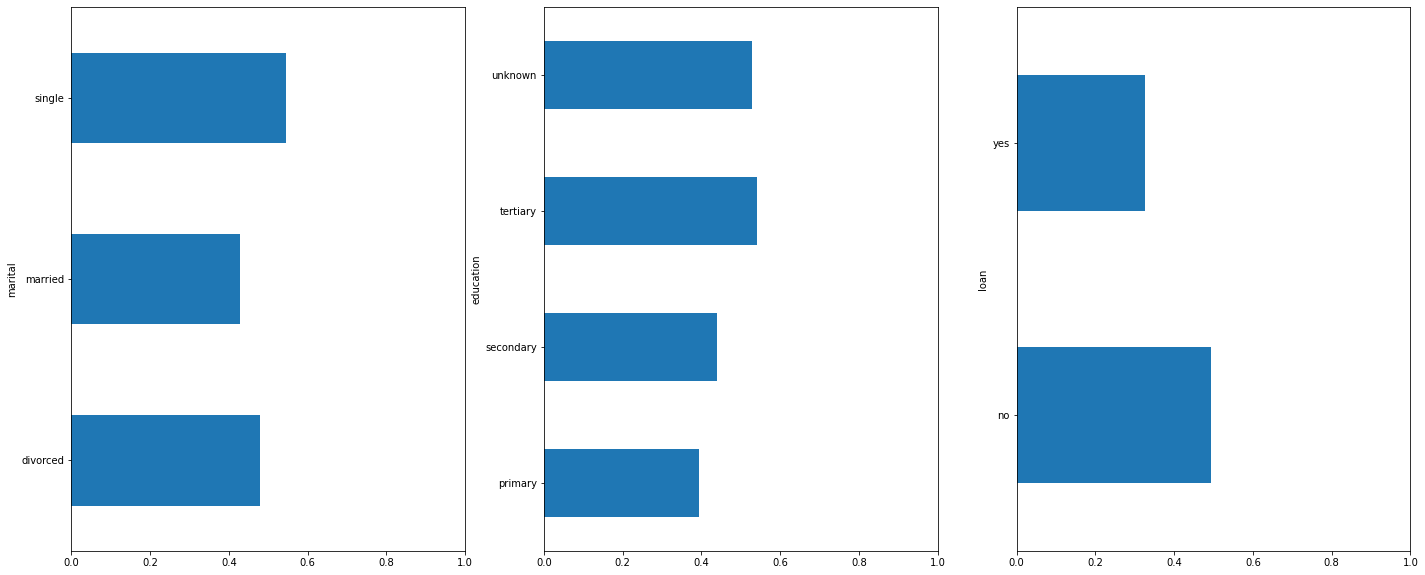

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['deposit']=le.fit_transform(data['deposit'])

figbi, axesbi = plt.subplots(1, 3, figsize=(24, 10))
data.groupby('marital')['deposit'].mean().plot(kind='barh',ax=axesbi[0],xlim=[0,1])
data.groupby('education')['deposit'].mean().plot(kind='barh',ax=axesbi[1],xlim=[0,1])
data.groupby('loan')['deposit'].mean().plot(kind='barh',ax=axesbi[2],xlim=[0,1])

* Comparing the marital status, single clients are most likely to subscribe whereas married clients are least likely to subscribe.

* Comparing education, a clear relation can be seen as tertiary educated client is most likely to subscribe, secondary in the middle and primary being the least likely to.

* Loan status is also tied to the subscription as seen in the plot.

## Describing Object Datatypes

In [73]:
data.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,8371,8371,8371,8371,8371,8371,8371,8371,8371
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,no,no,cellular,may,unknown
freq,1923,4744,4113,8244,4354,7250,6041,2135,6269


## Describing Numerical Datatypes

In [74]:
data.describe(include=['number'])

,age,balance,day,duration,campaign,pdays,previous,deposit
count,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000
mean,41.197467,1517.811134,15.588460,372.898698,2.512603,49.911958,0.823677,0.471031
std,11.809300,3225.312218,8.406768,346.706743,2.734037,107.308417,2.315285,0.499190
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,116.000000,8.000000,137.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,532.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1694.000000,21.000000,504.000000,3.000000,2.000000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3284.000000,63.000000,854.000000,58.000000,1.000000


## Converting categorical data into numerical

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categories=data.describe(include=['object'])
for i in categories:
  data[i]=le.fit_transform(data[i])

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,9,1,2,0,127,1,0,0,14,10,113,1,50,2,2,0
1,41,3,1,0,0,365,0,0,0,8,1,203,5,-1,0,3,0
2,39,4,2,2,0,2454,1,0,0,4,8,716,3,263,2,0,1
3,49,1,1,0,0,6215,1,0,0,11,8,549,1,-1,0,3,0
4,37,7,1,1,0,1694,1,1,0,29,4,404,2,251,6,0,0


In [76]:
data.describe(include=['number'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000
mean,41.197467,4.479871,1.198662,1.284076,0.015171,1517.811134,0.479871,0.133915,0.488950,15.588460,5.445347,372.898698,2.512603,49.911958,0.823677,2.487278,0.471031
std,11.809300,3.240451,0.627584,0.750187,0.122242,3225.312218,0.499625,0.340581,0.819252,8.406768,3.177124,346.706743,2.734037,107.308417,2.315285,0.993491,0.499190
min,18.000000,0.000000,0.000000,0.000000,0.000000,-3058.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,116.000000,0.000000,0.000000,0.000000,8.000000,3.000000,137.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,532.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1694.000000,1.000000,0.000000,1.000000,21.000000,8.000000,504.000000,3.000000,2.000000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3284.000000,63.000000,854.000000,58.000000,3.000000,1.000000


Confirmed data conversion by describing numerical datatypes

Writing out converted numeric data

In [79]:
data.to_csv('/content/data_numeric.csv', index=False)